In [117]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

In [118]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([-2,1,5])
sigma_true = np.array([0.9, 0.3, .7])

N = 10000
obs = np.zeros(N)

for i in range(N):
    z = np.random.random_sample()
    idx = 0
    tempSum = 0
    
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    obs[i] = v_temp;

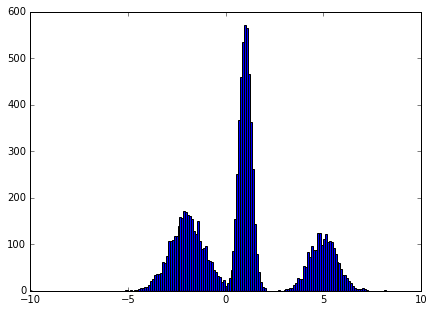

In [119]:
plt.figure(1, figsize=(7,5))
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

In [122]:
sigma_assumed = 40
sample = np.zeros(N)
idx = np.zeros(N)
idx = idx.astype(int)
sample[0] = 0
idx[0] = 1

for i in range(1,N):
    idx[i] = np.random.random_integers(3)-1
    sample[i] = np.random.normal(sample[i],sigma_assumed, 1)
    p_t = pi_true[idx[i]] * multivariate_normal.pdf(sample[i], mu_true[idx[i]], sigma_true[idx[i]])
    q_t = multivariate_normal.pdf(sample[i], sample[i-1], sigma_assumed)
    p_t_1 = pi_true[idx[i-1]] * multivariate_normal.pdf(sample[i-1], mu_true[idx[i-1]], sigma_true[idx[i-1]])
    q_t_1 = multivariate_normal.pdf(sample[i-1], sample[i], sigma_assumed)
    
    alpha = (p_t * q_t) / (p_t_1 * q_t_1)
    if alpha > 1:
        alpha = 1
    
    u = np.random.uniform(0,1,1)[0]
    if u >= alpha:
        sample[i] = sample[i-1]
        idx[i] = idx[i-1]


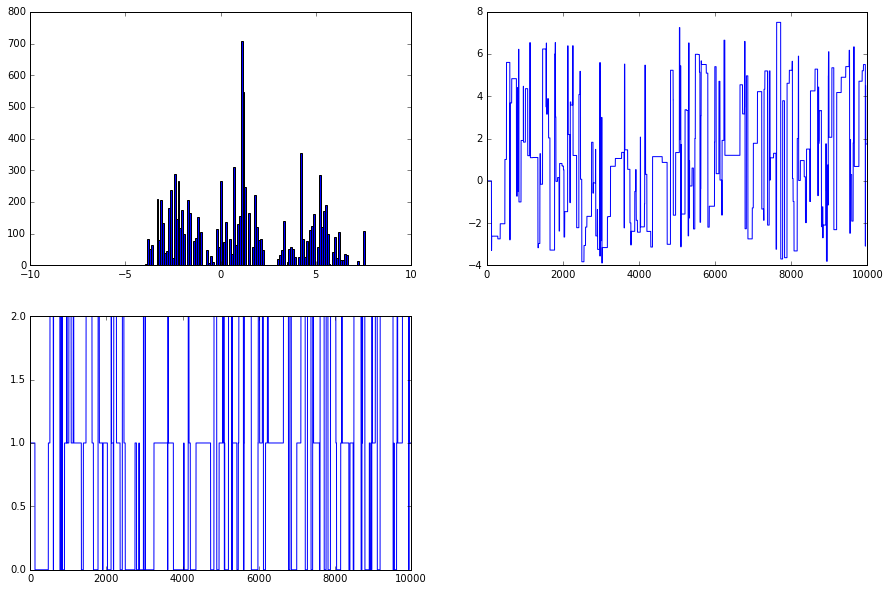

In [128]:
plt.figure(1, figsize=(15,10))
plt.subplot(2, 2, 1)
plt.hist(sample, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(2, 2, 2)
plt.plot(np.arange(N), sample)

plt.subplot(2, 2, 3)
plt.plot(np.arange(N), idx)
plt.show()